## Ch 3 - Point-to-Point Information Theory

Reference: Ch 3 of A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011.

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(solver = "pyomo.glpk")     # Set linear programming solver
PsiOpts.setting(repr_latex = True)         # Jupyter Notebook LaTeX display
PsiOpts.setting(venn_latex = True)         # LaTeX in diagrams
PsiOpts.setting(proof_note_color = "blue") # Reasons in proofs are blue

### Thm 3.1 (Channel Coding Theorem)

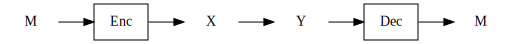

In [2]:
X, Y, M = rv("X, Y, M")
R = real("R")

model = CodingModel()                # Define point-to-point channel
model.set_rate(M, R)                 # The rate of M is R
model.add_node(M, X, label = "Enc")  # Encoder maps M to X
model.add_edge(X, Y)                 # Channel X -> Y
model.add_node(Y, M, label = "Dec")  # Decoder maps Y to M

model.graph()                        # Draw diagram

In [3]:
r = model.get_inner(is_proof=True)  # Automatic inner bound
r.display(note=True)

<IPython.core.display.Math object>

In [4]:
model.get_outer().simplified()  # Automatic outer bound

( ( R >= 0 )
 &( R <= I(X&Y) ) )

In [5]:
# Converse proof
model.proof_outer(r)

### Thm 3.2 (Channel Coding with Input Cost)

Same as above

### Thm 3.3 (Gaussian Channel)

Skipped

### Thm 3.4 (Lossless Source Coding)


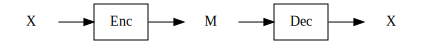

In [6]:
X, M = rv("X, M")
R = real("R")

model = CodingModel()
model.set_rate(M, R)
model.add_node(X, M, label = "Enc")
model.add_node(M, X, label = "Dec")

model.graph()

In [7]:
r = model.get_inner(is_proof=True)  # Automatic inner bound
r.display(note=True)

<IPython.core.display.Math object>

In [8]:
model.get_outer().simplified()  # Automatic outer bound

R >= H(X) 

In [9]:
# Converse proof
model.proof_outer(r)

### Thm 3.5 (Lossy Source Coding)


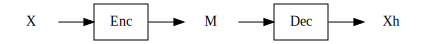

In [10]:
X, M = rv("X, M")
Xh = rv("Xh", latex="\hat{X}")
R = real("R")

model = CodingModel()
model.set_rate(M, R)
model.add_node(X, M, label = "Enc")
model.add_node(M, Xh, label = "Dec")

model.graph()

In [11]:
r = model.get_inner(is_proof=True)  # Automatic inner bound
r.display(note=True)

<IPython.core.display.Math object>

In [12]:
model.get_outer().simplified()  # Automatic outer bound

R >= I(X&Xh) 

In [13]:
# Converse proof
model.proof_outer(r)

### Thm 3.6 (Quadratic Gaussian Source Coding)

Skipped

### Thm 3.7 (Joint Source-Channel Coding)


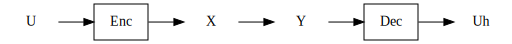

In [14]:
X, Y, U = rv("X, Y, U")
Uh = rv("Uh", latex="\hat{U}")

model = CodingModel()                # Define point-to-point channel
model.add_node(U, X, label = "Enc")  # Encoder maps M to X
model.add_edge(X, Y)                 # Channel X -> Y
model.add_node(Y, Uh, label = "Dec")  # Decoder maps Y to M

# By default, CodingModel imposes a constraint that the joint empirical
# distribution of all random variables (U,X,Y,Uh) must tend to the prescribed
# distribution. This is not necessary for joint source-channel coding, and we
# only need to control the joint distribution of (U,Uh), and the joint
# distribution of (X,Y). Hence we prescribe this partition.

model.partition = [U+Uh, X+Y]

model.graph()                        # Draw diagram

In [15]:
r = model.get_inner(is_proof=True)  # Automatic inner bound
r.display(note=True)

<IPython.core.display.Math object>

In [16]:
# Converse proof
model.proof_outer(I(U & Uh) <= I(X & Y))

### References
- A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011.
